Highest Density Point: x = 0.84, y = 0.68527
Resampled Standard Deviation: 0.61, Sigma Density: 0.53534


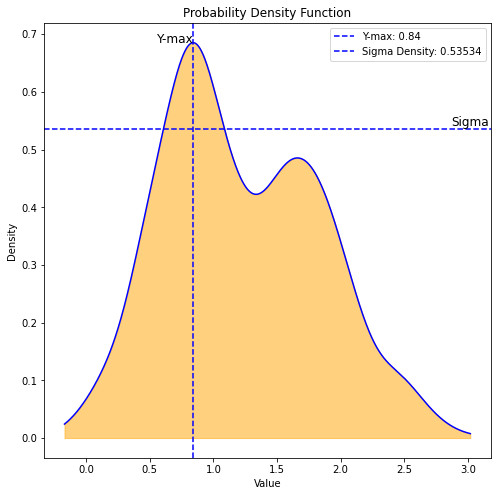

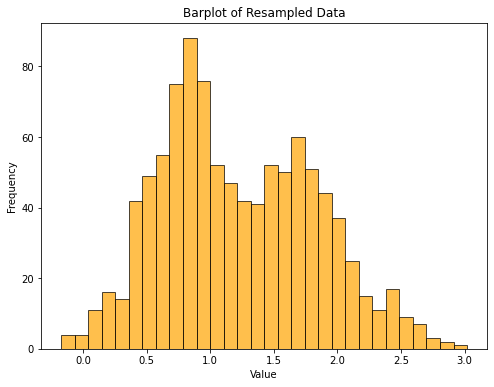

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        # Plot the KDE curve and filled area under it
        plt.fill_between(x, pdf, alpha=0.5, color='orange')  # Filled area under the curve
        plt.plot(x, pdf, color='blue')  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        plt.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Print the x and y values of the highest density point
        print(f"Highest Density Point: x = {max_density_value:.2f}, y = {max_density_y:.5f}")

        # Find the y-density corresponding to the resampled data standard deviation (resampled_std_value)
        sigma_density = kde(resampled_std_value)  # Get the KDE value (density) at resampled std

        # Add a horizontal dashed line at the Sigma density level
        plt.axhline(sigma_density, color='blue', linestyle='--', label=f'Sigma Density: {sigma_density[0]:.5f}')

        # Print the resampled standard deviation and its corresponding density value
        print(f"Resampled Standard Deviation: {resampled_std_value:.2f}, Sigma Density: {sigma_density[0]:.5f}")

        # Label positioning for the plot
        plt.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')
        plt.text(x.max() * 0.95, sigma_density, "Sigma", fontsize=12, va='bottom', color='black')

        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(title)

        # Remove grid lines
        plt.grid(False)
        
        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde_and_bar(new_data):
    if new_data.size > 0:
        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Plot resampled KDE with highest density and std line
        plt.figure(figsize=(8, 8))  # Make the plot square
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Probability Density Function")

        # Plot bar plot of resampled data
        plt.figure(figsize=(8, 6))
        plt.hist(new_data, bins=30, alpha=0.7, color='orange', edgecolor='black')  # Bar plot (histogram) of resampled data
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Barplot of Resampled Data')
        plt.show()
    else:
        print("Insufficient data for barplot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Call the function to plot KDE and bar plot
        plot_resampled_kde_and_bar(new_data)

    else:
        print("Insufficient data for KDE and barplot.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


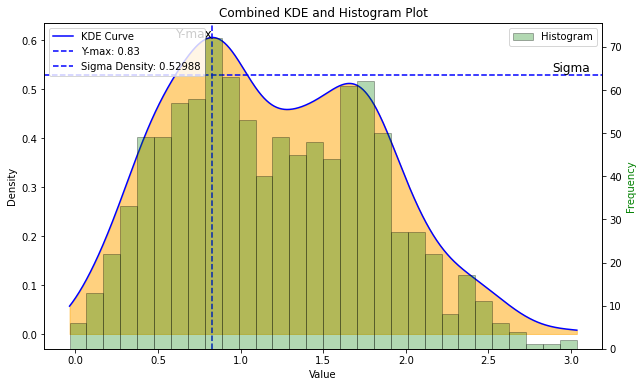

In [6]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot the KDE curve and filled area under it
        ax1.fill_between(x, pdf, alpha=0.5, color='orange')  # Filled area under the curve
        ax1.plot(x, pdf, color='blue', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Plot the resampled data standard deviation (std) line only if within the range of the KDE curve
        if x.min() <= resampled_std_value <= x.max():
            sigma_density = kde(resampled_std_value)  # Get the KDE value (density) at resampled std
            ax1.axhline(sigma_density, color='blue', linestyle='--', label=f'Sigma Density: {sigma_density[0]:.5f}')
            ax1.text(x.max() * 0.95, sigma_density, "Sigma", fontsize=12, va='bottom', color='black')

        # Label the highest density point
        ax1.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')

        # Plot bar plot (histogram) on a second y-axis (to scale differently)
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='green', edgecolor='black', label="Histogram")
        ax2.set_ylabel('Frequency', color='green')

        # Set labels and title
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.set_title(title)

        # Add legends for both axes
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Combined KDE and Histogram Plot")

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


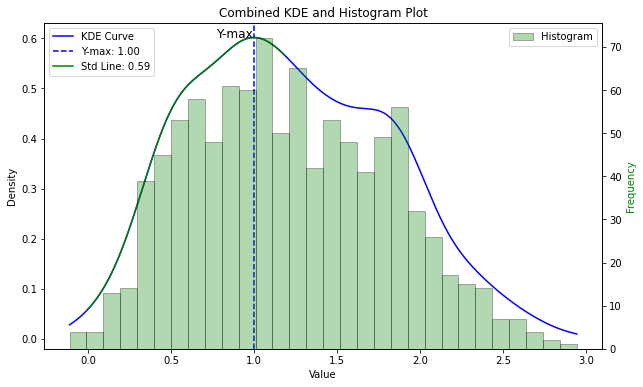

In [7]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot the KDE curve without fill
        ax1.plot(x, pdf, color='blue', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Plot the resampled data standard deviation (std) line but clipped within the curve
        if x.min() <= resampled_std_value <= x.max():
            sigma_density = kde(resampled_std_value)  # Get the KDE value (density) at resampled std

            # Define the range of x where std line will be plotted
            std_x_range = x[(x >= resampled_std_value - np.std(data)) & (x <= resampled_std_value + np.std(data))]
            std_y_range = kde(std_x_range)

            # Plot only the part of the std line inside the curve
            ax1.plot(std_x_range, std_y_range, color='green', linestyle='-', label=f'Std Line: {resampled_std_value:.2f}')

        # Label the highest density point
        ax1.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')

        # Plot bar plot (histogram) on a second y-axis
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='green', edgecolor='black', label="Histogram")
        ax2.set_ylabel('Frequency', color='green')

        # Set labels and title
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.set_title(title)

        # Add legends for both axes
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Combined KDE and Histogram Plot")

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


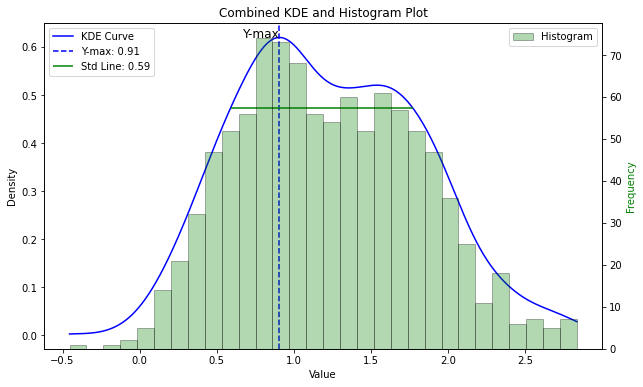

In [8]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot the KDE curve without fill
        ax1.plot(x, pdf, color='blue', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Find the corresponding KDE value (density) at the standard deviation (std) level
        std_density = kde(resampled_std_value)[0]

        # Plot a horizontal line at the standard deviation level, but limit it to the region under the curve
        x_range_within_curve = x[pdf >= std_density]  # Ensure line is within the KDE curve
        ax1.hlines(std_density, x_range_within_curve[0], x_range_within_curve[-1], color='green', linestyle='-', label=f'Std Line: {resampled_std_value:.2f}')

        # Label the highest density point
        ax1.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')

        # Plot bar plot (histogram) on a second y-axis
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='green', edgecolor='black', label="Histogram")
        ax2.set_ylabel('Frequency', color='green')

        # Set labels and title
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.set_title(title)

        # Add legends for both axes
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Combined KDE and Histogram Plot")

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


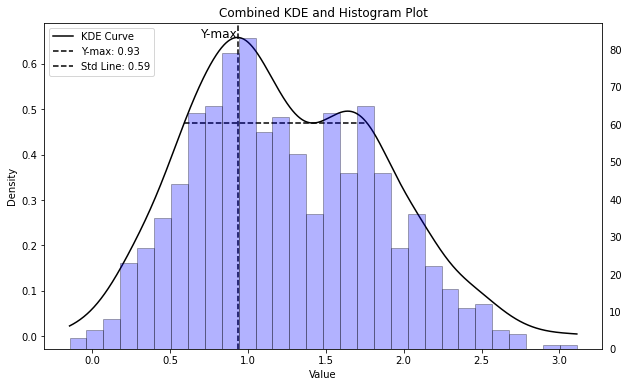

In [9]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Set frame line width and color
        ax1.spines['top'].set_linewidth(0.5)
        ax1.spines['right'].set_linewidth(0.5)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        for spine in ax1.spines.values():
            spine.set_edgecolor('gray')
            spine.set_alpha(0.5)  # 50% transparency for the frame

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max) with a black dashed line
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='black', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Find the corresponding KDE value (density) at the standard deviation (std) level
        std_density = kde(resampled_std_value)[0]

        # Plot a horizontal dashed line at the standard deviation level, but limit it to the region under the curve
        x_range_within_curve = x[pdf >= std_density]  # Ensure line is within the KDE curve
        ax1.hlines(std_density, x_range_within_curve[0], x_range_within_curve[-1], color='black', linestyle='--', label=f'Std Line: {resampled_std_value:.2f}')

        # Label the highest density point
        ax1.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')

        # Plot bar plot (histogram) on a second y-axis
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black', label="Histogram")  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side

        # Set labels and title
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.set_title(title)

        # Add legends for both axes
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Combined KDE and Histogram Plot")

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


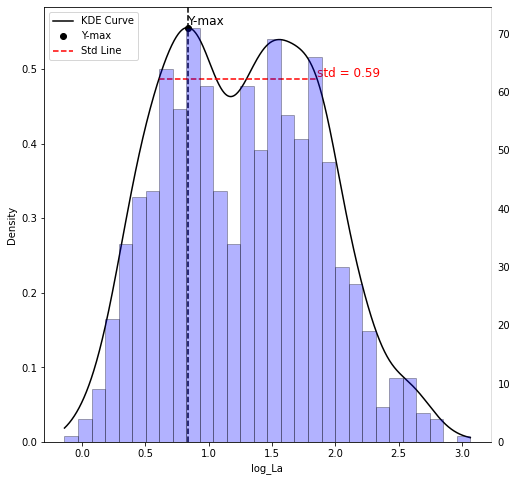

In [10]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Set frame line width and color
        ax1.spines['top'].set_linewidth(0.5)
        ax1.spines['right'].set_linewidth(0.5)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        for spine in ax1.spines.values():
            spine.set_edgecolor('gray')
            spine.set_alpha(0.5)  # 50% transparency for the frame

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max) with a black dashed line within the curve
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='black', linestyle='--')  # Y-max line restricted within the curve
        ax1.plot(max_density_value, max_density_y, 'o', color='black', label='Y-max')  # Circle marker at Y-max

        # Find the corresponding KDE value (density) at the standard deviation (std) level
        std_density = kde(resampled_std_value)[0]

        # Plot a horizontal red dashed line at the standard deviation level, limited to the region under the curve
        x_range_within_curve = x[pdf >= std_density]  # Ensure line is within the KDE curve
        ax1.hlines(std_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Std Line")

        # Label the standard deviation line with "std = 0.59"
        ax1.text(x_range_within_curve[-1], std_density, "std = 0.59", fontsize=12, va='bottom', color='red')

        # Label the X-max value
        ax1.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='left', va='bottom', color='black')

        # Remove right y-axis for the frequency
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black')  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side
        ax2.spines['right'].set_visible(False)  # Completely remove the right spine

        # Set labels
        ax1.set_xlabel('log_La')  # Changed x-axis label to 'log_La'
        ax1.set_ylabel('Density')
        ax1.set_ylim([0, None])  # Automatically limit the y-axis based on the data

        # Remove numbers from the legend
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


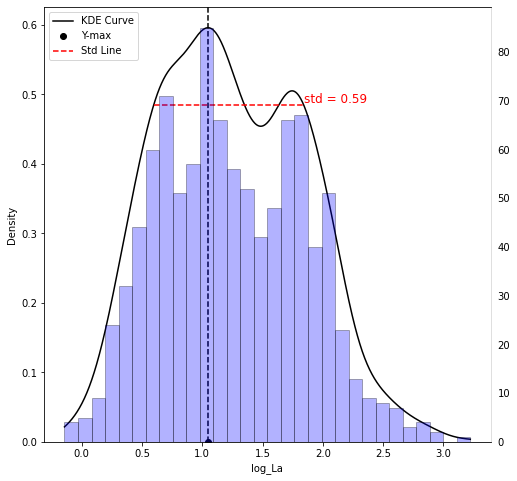

In [11]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Set frame line width and color
        ax1.spines['top'].set_linewidth(0.5)
        ax1.spines['right'].set_linewidth(0.5)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        for spine in ax1.spines.values():
            spine.set_edgecolor('gray')
            spine.set_alpha(0.5)  # 50% transparency for the frame

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max) with a black dashed line within the curve
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='black', linestyle='--')  # Y-max line restricted within the curve

        # Plot a circle at Y-max on the x-axis (not on the curve)
        ax1.plot(max_density_value, 0, 'o', color='black', label='Y-max')  # Circle marker at X-max on x-axis

        # Find the corresponding KDE value (density) at the standard deviation (std) level
        std_density = kde(resampled_std_value)[0]

        # Plot a horizontal red dashed line at the standard deviation level, limited to the region under the curve
        x_range_within_curve = x[pdf >= std_density]  # Ensure line is within the KDE curve
        ax1.hlines(std_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Std Line")

        # Label the standard deviation line with "std = 0.59"
        ax1.text(x_range_within_curve[-1], std_density, "std = 0.59", fontsize=12, va='bottom', color='red')

        # Remove right y-axis ticks and numbers
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black')  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side
        ax2.spines['right'].set_visible(False)  # Completely remove the right spine

        # Set labels
        ax1.set_xlabel('log_La')  # Changed x-axis label to 'log_La'
        ax1.set_ylabel('Density')
        ax1.set_ylim([0, None])  # Automatically limit the y-axis based on the data

        # Remove numbers from the legend
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


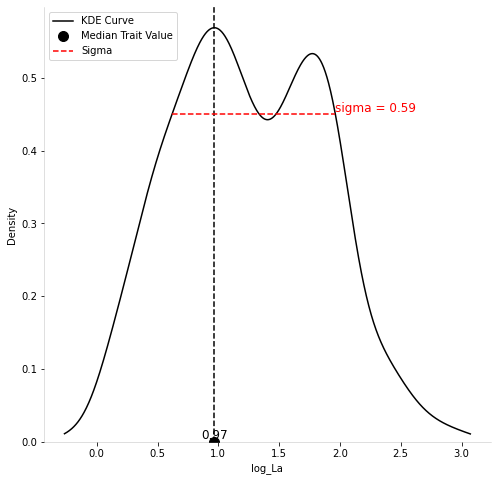

In [12]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Remove top and right frame lines
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        ax1.spines['bottom'].set_edgecolor('gray')
        ax1.spines['left'].set_edgecolor('gray')
        ax1.spines['bottom'].set_alpha(0.5)  # 50% transparency
        ax1.spines['left'].set_alpha(0.5)    # 50% transparency

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (Y-max) with a larger circle for median trait value
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(max_density_value, color='black', linestyle='--')  # Vertical line for median trait value
        ax1.plot(max_density_value, 0, 'o', color='black', markersize=10, label='Median Trait Value')  # Larger circle marker

        # Annotate the median trait value with the x-value on the x-axis
        ax1.text(max_density_value, 0, f"{max_density_value:.2f}", fontsize=12, ha='center', va='bottom', color='black')

        # Find the corresponding KDE value (density) at the standard deviation (sigma) level
        sigma_density = kde(resampled_std_value)[0]

        # Plot a horizontal red dashed line labeled as "Sigma"
        x_range_within_curve = x[pdf >= sigma_density]  # Ensure line is within the KDE curve
        ax1.hlines(sigma_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Sigma")

        # Label the Sigma line with "sigma = 0.59"
        ax1.text(x_range_within_curve[-1], sigma_density, "sigma = 0.59", fontsize=12, va='bottom', color='red')

        # Set labels
        ax1.set_xlabel('log_La')  # X-axis label is 'log_La'
        ax1.set_ylabel('Density')

        # Automatically limit the y-axis based on the data
        ax1.set_ylim([0, None])

        # Remove numbers from the legend
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


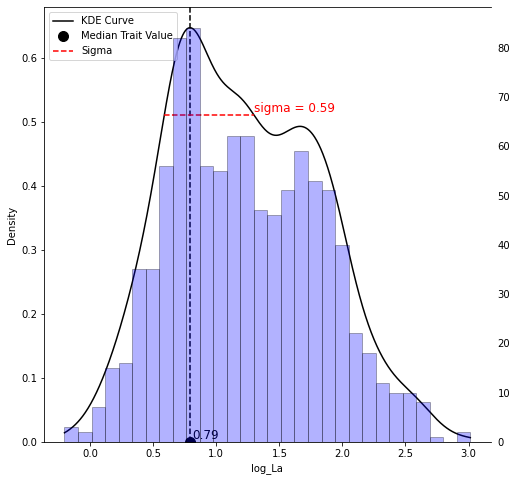

In [13]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Remove top and right frame lines
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        ax1.spines['bottom'].set_edgecolor('gray')
        ax1.spines['left'].set_edgecolor('gray')
        ax1.spines['bottom'].set_alpha(0.5)  # 50% transparency
        ax1.spines['left'].set_alpha(0.5)    # 50% transparency

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (median trait value) with a larger circle for median trait value
        max_density_index = np.argmax(pdf)
        median_trait_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        ax1.axvline(median_trait_value, color='black', linestyle='--')  # Vertical line for median trait value
        ax1.plot(median_trait_value, 0, 'o', color='black', markersize=10, label='Median Trait Value')  # Larger circle marker

        # Annotate the median trait value with the x-value on the x-axis, shifted slightly to the right
        ax1.text(median_trait_value + 0.02, 0, f"{median_trait_value:.2f}", fontsize=12, ha='left', va='bottom', color='black')

        # Find the corresponding KDE value (density) at the standard deviation (sigma) level
        sigma_density = kde(resampled_std_value)[0]

        # Plot a horizontal red dashed line labeled as "Sigma"
        x_range_within_curve = x[pdf >= sigma_density]  # Ensure line is within the KDE curve
        ax1.hlines(sigma_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Sigma")

        # Label the Sigma line with "sigma = 0.59"
        ax1.text(x_range_within_curve[-1], sigma_density, "sigma = 0.59", fontsize=12, va='bottom', color='red')

        # Plot bar plot (histogram) on the second y-axis
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black')  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side
        ax2.spines['right'].set_visible(False)  # Completely remove the right spine

        # Set labels
        ax1.set_xlabel('log_La')  # X-axis label is 'log_La'
        ax1.set_ylabel('Density')

        # Automatically limit the y-axis based on the data
        ax1.set_ylim([0, None])

        # Remove numbers from the legend
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


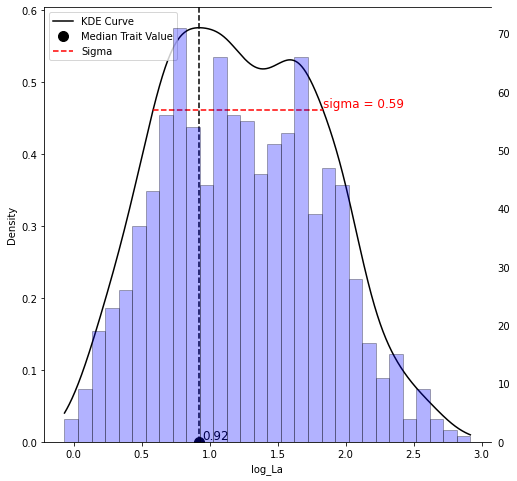

In [14]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Remove top and right frame lines
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        ax1.spines['bottom'].set_edgecolor('gray')
        ax1.spines['left'].set_edgecolor('gray')
        ax1.spines['bottom'].set_alpha(0.5)  # 50% transparency
        ax1.spines['left'].set_alpha(0.5)    # 50% transparency

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (median trait value)
        max_density_index = np.argmax(pdf)
        median_trait_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        
        # Plot Y-max line restricted to the curve
        ax1.axvline(median_trait_value, ymin=0, ymax=max_density_y/max(pdf), color='black', linestyle='--')

        # Plot median trait value as a larger circle
        ax1.plot(median_trait_value, 0, 'o', color='black', markersize=10, label='Median Trait Value')  # Larger circle marker

        # Annotate the median trait value with the x-value on the x-axis, shifted slightly to the right
        ax1.text(median_trait_value + 0.02, 0, f"{median_trait_value:.2f}", fontsize=12, ha='left', va='bottom', color='black')

        # Find the corresponding KDE value (density) at the standard deviation (sigma) level
        sigma_density = kde(resampled_std_value)[0]

        # Plot a horizontal red dashed line labeled as "Sigma"
        x_range_within_curve = x[pdf >= sigma_density]  # Ensure line is within the KDE curve
        ax1.hlines(sigma_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Sigma")

        # Label the Sigma line with "sigma = 0.59"
        ax1.text(x_range_within_curve[-1], sigma_density, "sigma = 0.59", fontsize=12, va='bottom', color='red')

        # Plot bar plot (histogram) on the second y-axis
        ax2 = ax1.twinx()
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black')  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side
        ax2.spines['right'].set_visible(False)  # Completely remove the right spine

        # Set labels
        ax1.set_xlabel('log_La')  # X-axis label is 'log_La'
        ax1.set_ylabel('Density')

        # Automatically limit the y-axis based on the data
        ax1.set_ylim([0, None])

        # Remove numbers from the legend
        ax1.legend(loc='upper left')

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


0.08975022629403731


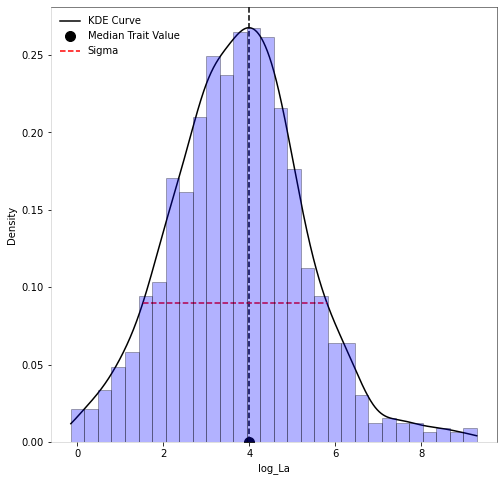

In [5]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        fig, ax1 = plt.subplots(figsize=(8, 8))  # Square frame

        # Remove top and right frame lines
        ax1.spines['top'].set_linewidth(0.5)
        ax1.spines['right'].set_linewidth(0.5)
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        ax1.spines['bottom'].set_edgecolor('gray')
        ax1.spines['left'].set_edgecolor('gray')
        ax1.spines['bottom'].set_alpha(0.5)  # 50% transparency
        ax1.spines['left'].set_alpha(0.5)    # 50% transparency

        # Plot the KDE curve in black without fill
        ax1.plot(x, pdf, color='black', label="KDE Curve")  # KDE curve

        # Find and plot the highest density point (median trait value)
        max_density_index = np.argmax(pdf)
        median_trait_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        
        # Plot Y-max line restricted to the curve
        ax1.axvline(median_trait_value, ymin=0, ymax=max_density_y/max(pdf), color='black', linestyle='--')

        # Plot median trait value as a larger circle
        ax1.plot(median_trait_value, 0, 'o', color='black', markersize=10, label='Median Trait Value')  # Larger circle marker

        # Annotate the median trait value with the x-value on the x-axis, shifted slightly to the right
#         ax1.text(median_trait_value + 0.02, 0, f"{median_trait_value:.2f}", fontsize=12, ha='left', va='bottom', color='black')

        # Find the corresponding KDE value (density) at the standard deviation (sigma) level
        sigma_density = kde(resampled_std_value)[0]
        print(sigma_density)

        # Plot a horizontal red dashed line labeled as "Sigma"
        x_range_within_curve = x[pdf >= sigma_density]  # Ensure line is within the KDE curve
        ax1.hlines(sigma_density, x_range_within_curve[0], x_range_within_curve[-1], color='red', linestyle='--', label="Sigma")

        # Label the Sigma line with "sigma = 0.59"
#         ax1.text(x_range_within_curve[-1], sigma_density, "sigma = 0.59", fontsize=12, va='bottom', color='red')
        

        # Plot bar plot (histogram) on the second y-axis
        ax2 = ax1.twinx()
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.hist(data, bins=30, alpha=0.3, color='blue', edgecolor='black')  # 30% transparency blue
        ax2.set_ylabel(None)  # Remove frequency labels on the right side
        ax2.tick_params(right=False)  # Remove ticks on the right side
        ax2.spines['right'].set_visible(False)  # Completely remove the right spine

        # Remove the numbers and ticks on the right side y-axis
        ax2.set_yticks([])  # This will remove all numbers and ticks on the right

        # Set labels
        ax1.set_xlabel('log_La')  # X-axis label is 'log_La'
        ax1.set_ylabel('Density')

        # Automatically limit the y-axis based on the data
        ax1.set_ylim([0, None])

        # Remove numbers from the legend
        ax1.legend(loc='upper left', frameon=False)

        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Call the function to plot KDE and histogram combined
        plot_kde_with_density_and_std(new_data, resampled_std_value)

    else:
        print("Insufficient data for KDE and histogram.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_44_018.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


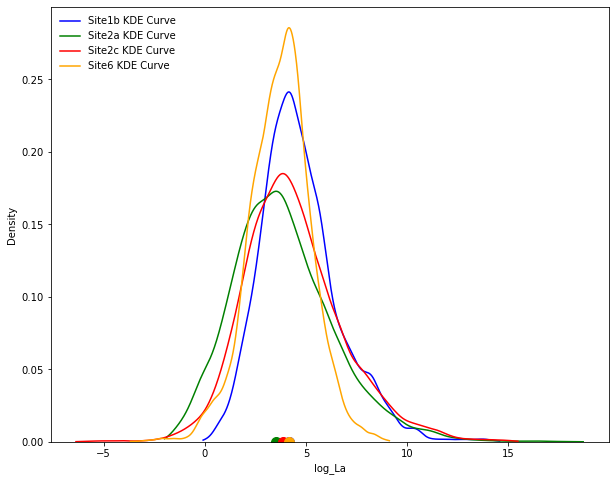

In [2]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data != 0].flatten()

def plot_combined_kde(data_list, file_labels, colors, num_points=1000):
    fig, ax1 = plt.subplots(figsize=(10, 8))  # One combined figure

    for data, label, color in zip(data_list, file_labels, colors):
        if data.size > 0:
            kde = gaussian_kde(data)
            x = np.linspace(data.min(), data.max(), num_points)
            pdf = kde(x)

            # Plot the KDE curve in a specified color
            ax1.plot(x, pdf, color=color, label=f"{label} KDE Curve")

            # Find and plot the highest density point (median trait value)
            max_density_index = np.argmax(pdf)
            median_trait_value = x[max_density_index]

            # Plot median trait value as a larger circle
            ax1.plot(median_trait_value, 0, 'o', color=color, markersize=10)  # Larger circle marker for median

    # Customize the plot
    ax1.set_xlabel('log_La')
    ax1.set_ylabel('Density')

    # Automatically limit the y-axis based on the data
    ax1.set_ylim([0, None])

    # Display the legend
    ax1.legend(loc='upper left', frameon=False)

    plt.show()

# Example usage for four images
file_paths = [
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site2a\la\la_site2a_26_015.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site2c\la\la_site2c_19_019.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_43_019.tif'
]

data_list = [read_and_process_data(file) for file in file_paths]
file_labels = ['Site1b', 'Site2a', 'Site2c', 'Site6']
colors = ['blue', 'green', 'red', 'orange']  # Different colors for differentiation

# Call the combined plot function
plot_combined_kde(data_list, file_labels, colors)


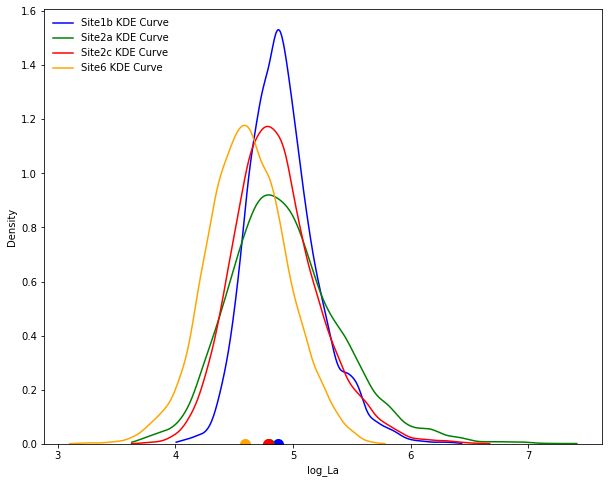

In [5]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data != 0].flatten()

def plot_combined_kde(data_list, file_labels, colors, num_points=1000):
    fig, ax1 = plt.subplots(figsize=(10, 8))  # One combined figure

    for data, label, color in zip(data_list, file_labels, colors):
        if data.size > 0:
            kde = gaussian_kde(data)
            x = np.linspace(data.min(), data.max(), num_points)
            pdf = kde(x)

            # Plot the KDE curve in a specified color
            ax1.plot(x, pdf, color=color, label=f"{label} KDE Curve")

            # Find and plot the highest density point (median trait value)
            max_density_index = np.argmax(pdf)
            median_trait_value = x[max_density_index]

            # Plot median trait value as a larger circle
            ax1.plot(median_trait_value, 0, 'o', color=color, markersize=10)  # Larger circle marker for median

    # Customize the plot
    ax1.set_xlabel('log_La')
    ax1.set_ylabel('Density')

    # Automatically limit the y-axis based on the data
    ax1.set_ylim([0, None])

    # Display the legend
    ax1.legend(loc='upper left', frameon=False)

    plt.show()

# Example usage for four images
file_paths = [
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site2a\sla\sla_site2a_26_015.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site2c\sla\sla_site2c_19_019.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\sla\sla_site6_43_019.tif'
]

data_list = [read_and_process_data(file) for file in file_paths]
file_labels = ['Site1b', 'Site2a', 'Site2c', 'Site6']
colors = ['blue', 'green', 'red', 'orange']  # Different colors for differentiation

# Call the combined plot function
plot_combined_kde(data_list, file_labels, colors)


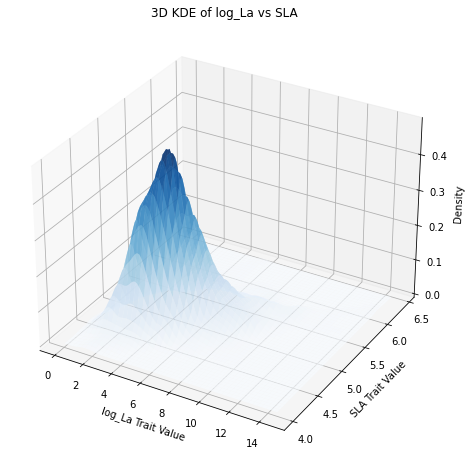

In [6]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# Labels and Titles
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE of log_La vs SLA')

# Show plot
plt.show()


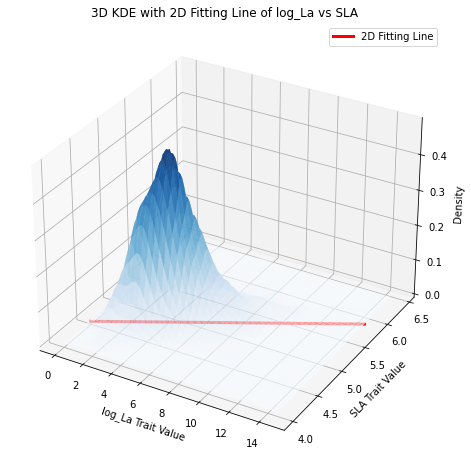

In [7]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file


log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# Perform a 2D linear regression (you can switch to polynomial if needed)
X_reshaped = log_la_data.reshape(-1, 1)  # Reshape for regression
model = LinearRegression()
model.fit(X_reshaped, sla_data)

# Generate the fitted line (Y = a * X + b)
y_fit = model.predict(x.reshape(-1, 1))

# Project the 2D fitting line onto the 3D surface
ax.plot(x, y_fit, zs=0, zdir='z', color='red', label='2D Fitting Line', linewidth=3)

# Add labels and titles
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with 2D Fitting Line of log_La vs SLA')

# Show plot
plt.legend()
plt.show()



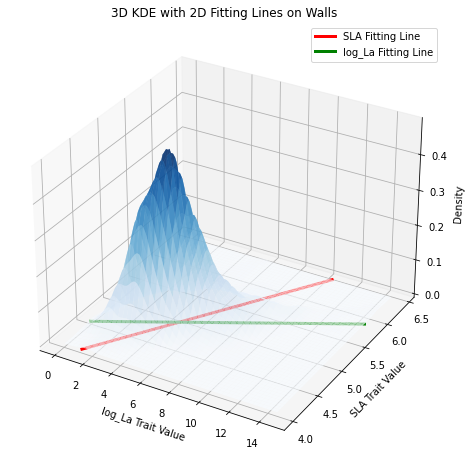

In [8]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# SLA fitting line (on the SLA axis wall)
sla_model = LinearRegression()
sla_model.fit(sla_data.reshape(-1, 1), log_la_data)  # SLA vs log_La fitting
sla_fit_log_la = sla_model.predict(y.reshape(-1, 1))
ax.plot(sla_fit_log_la, y, zs=0, zdir='z', color='red', label='SLA Fitting Line', lw=3)  # Fit line on SLA wall

# log_La fitting line (on the log_La axis wall)
la_model = LinearRegression()
la_model.fit(log_la_data.reshape(-1, 1), sla_data)  # log_La vs SLA fitting
la_fit_sla = la_model.predict(x.reshape(-1, 1))
ax.plot(x, la_fit_sla, zs=0, zdir='z', color='green', label='log_La Fitting Line', lw=3)  # Fit line on log_La wall

# Add labels and titles
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with 2D Fitting Lines on Walls')

# Show the legend
plt.legend()

# Show the plot
plt.show()


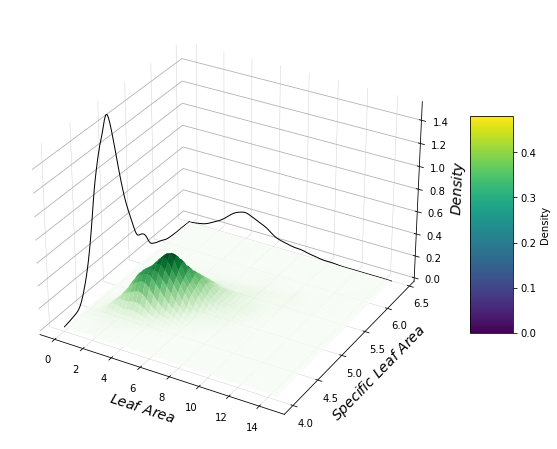

In [18]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
ax.plot_surface(X, Y, Z, cmap='Greens', edgecolor='none', alpha=0.9)


# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)


# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1, label="KDE of log_La")

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width



# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)  # Increase font size of tick labels

# Add a color bar (legend for cmap values)
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Density')


ax.set_xlabel(r'$\mathit{Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Specific\ Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)  



plt.show()


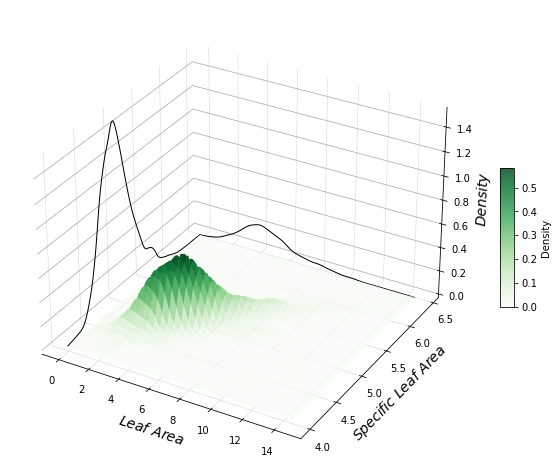

In [40]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
# Z[Z <= 0.1] = np.nan

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='Greens', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Specific\ Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)



# Save the plot as a PNG file
# Adjust margins to ensure everything is within the frame
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_la_sla.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution



plt.show()


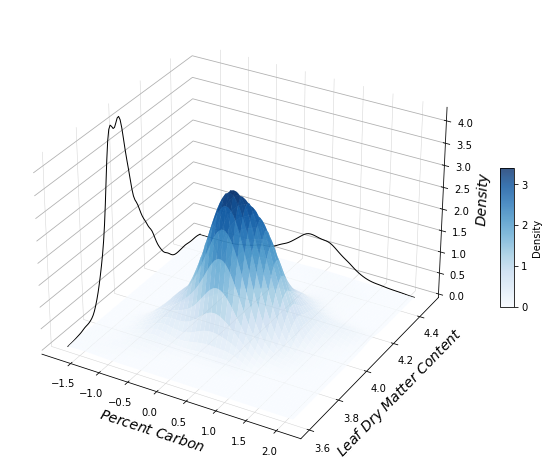

In [58]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\pc\pc_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\ldmc\ldmc_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.3  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
# Z[Z <= 0.1] = np.nan

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{Percent\ Carbon}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Leaf\ Dry\ Matter\ Content}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)



# Save the plot as a PNG file
# Adjust margins to ensure everything is within the frame
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_pc_ldmc.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution



plt.show()


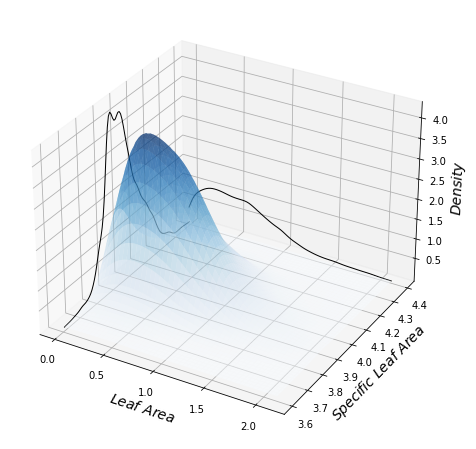

In [50]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\pc\pc_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\ldmc\ldmc_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.4  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.5)

# Plot marginal KDEs along the SLA (y) and log_La (x) axes
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Customize labels and formatting
ax.set_xlabel(r'$Leaf\ Area$', fontsize=14)
ax.set_ylabel(r'$Specific\ Leaf\ Area$', fontsize=14)
ax.set_zlabel(r'$Density$', fontsize=14)

# Display the plot
plt.show()


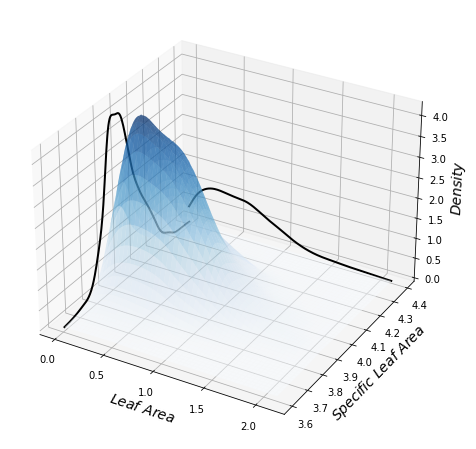

In [54]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\pc\pc_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\ldmc\ldmc_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE for the combined traits with higher bandwidth for smoothness
bandwidth_2d = 0.3  # Adjust as needed for smoothness
kde_2d = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth_2d)

# Define grid for log_La and SLA with higher resolution for smoothness
x = np.linspace(min(log_la_data), max(log_la_data), 200)
y = np.linspace(min(sla_data), max(sla_data), 200)
X, Y = np.meshgrid(x, y)

# Evaluate the 2D KDE on a grid of points
Z = kde_2d(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 1D KDE for log_La (Leaf Area) and SLA (Specific Leaf Area) separately
bandwidth_1d = 0.2  # You can adjust this for more or less smoothness in the 1D curves
kde_log_la = gaussian_kde(log_la_data, bw_method=bandwidth_1d)
kde_sla = gaussian_kde(sla_data, bw_method=bandwidth_1d)

# Generate marginal KDE values for plotting
log_la_density = kde_log_la(x)
sla_density = kde_sla(y)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D KDE surface
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.5)

# Plot the 1D KDE for log_La on the vertical wall along the log_La axis
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=2)

# Plot the 1D KDE for SLA on the wall corresponding to the SLA axis
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=2)

# Customize labels and formatting
ax.set_xlabel(r'$Leaf\ Area$', fontsize=14)
ax.set_ylabel(r'$Specific\ Leaf\ Area$', fontsize=14)
ax.set_zlabel(r'$Density$', fontsize=14)

# Display the plot
plt.show()


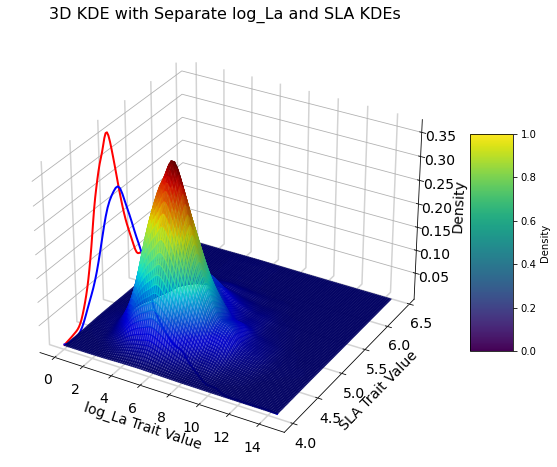

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Fit separate KDEs for log_La and SLA
kde_log_la = gaussian_kde(log_la_data)
kde_sla = gaussian_kde(sla_data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)  # log_La grid
y = np.linspace(min(sla_data), max(sla_data), 100)  # SLA grid

# Evaluate KDEs for the grid points
Z_log_la = kde_log_la(x)  # 1D KDE for log_La
Z_sla = kde_sla(y)  # 1D KDE for SLA

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for the surface plot
X, Y = np.meshgrid(x, y)

# Generate 2D surface from the product of the two KDEs
Z = np.outer(Z_log_la, Z_sla)

# Normalize Z for color mapping
Z_norm = Z / np.max(Z)

# Create a color map
colors = plt.cm.jet(Z_norm)
colors[..., -1] = 0.7  # Set constant transparency

# Plot the 2D surface (as a product of two 1D KDEs)
surface = ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, edgecolor='none')

# Plot p(y): KDE of SLA on the YZ plane
sla_density_normalized = Z_sla / np.max(Z_sla) * np.max(Z)  # Normalize to match the 3D surface scale
ax.plot(np.full_like(y, np.min(x)), y, sla_density_normalized, color='red', lw=2)

# Plot p(x): KDE of log_La on the XZ plane
log_la_density_normalized = Z_log_la / np.max(Z_log_la) * np.max(Z)  # Normalize to match the 3D surface scale
ax.plot(x, np.full_like(x, np.min(y)), log_la_density_normalized, color='blue', lw=2)






# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color='lightgray', linewidth=1.5)
ax.yaxis._axinfo['grid'].update(color='lightgray', linewidth=1.5)

# # Customize ticks: Only show 3 tick marks on each axis
# ax.set_xticks(np.linspace(min(log_la_data), max(log_la_data), 3))
# ax.set_yticks(np.linspace(min(sla_data), max(sla_data), 3))
# ax.set_zticks(np.linspace(0, np.max(Z), 3))

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=14)

# Add a color bar (legend for cmap values)
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Density')

# Add labels and titles
ax.set_xlabel('log_La Trait Value', fontsize=14)
ax.set_ylabel('SLA Trait Value', fontsize=14)
ax.set_zlabel('Density', fontsize=14)
ax.set_title('3D KDE with Separate log_La and SLA KDEs', fontsize=16)

# Show plot
plt.show()


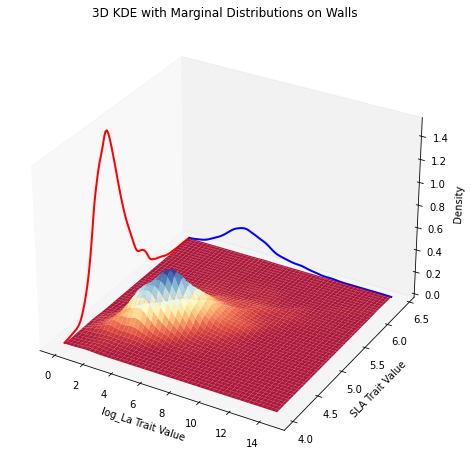

In [14]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
ax.plot_surface(X, Y, Z, cmap='RdYlBu', edgecolor='none', alpha=0.9)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='red', lw=2)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='blue', lw=2, label="KDE of log_La")

# Remove the grid
ax.grid(False)

# Add labels and titles
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Marginal Distributions on Walls')

# Show plot
plt.show()


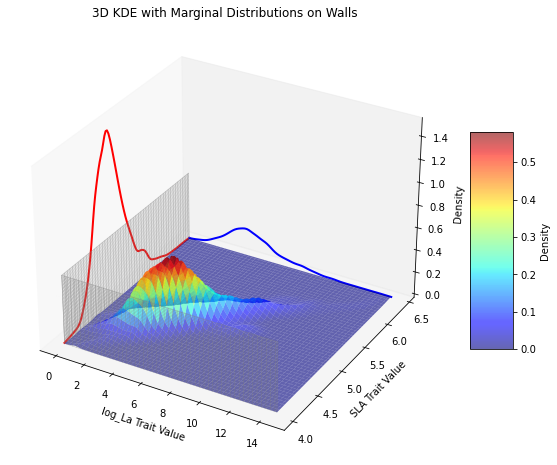

In [10]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()

    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and add contours
surface = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none', alpha=0.6)



# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='red', lw=2)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='blue', lw=2, label="KDE of log_La")

# Remove the grid
ax.grid(False)

# Add a color bar (legend for cmap values)
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Density')

# Add labels and titles
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Marginal Distributions on Walls')

# Show plot
plt.show()


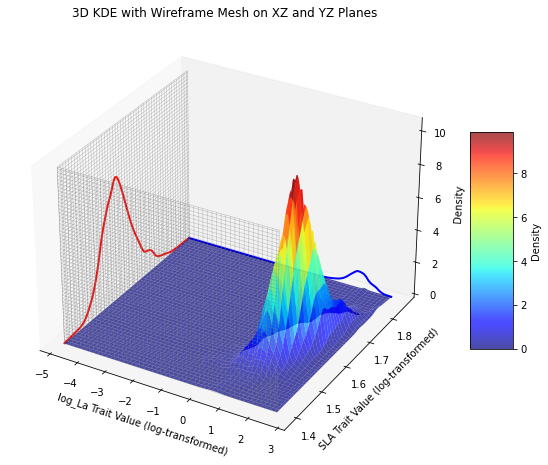

In [11]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it, with log transformation applied
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Apply log transformation (natural log)
    data = np.log(data[data > 0].flatten())  # Ensure that we only log-transform positive values
    return data

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none', alpha=0.7)

# Add wireframe on XZ plane (constant Y)
XZ, ZZ = np.meshgrid(x, np.linspace(0, np.max(Z), 100))
ax.plot_wireframe(XZ, np.full_like(XZ, np.min(y)), ZZ, color='gray', linewidth=0.5, alpha=0.5)

# Add wireframe on YZ plane (constant X)
YZ, ZZ = np.meshgrid(y, np.linspace(0, np.max(Z), 100))
ax.plot_wireframe(np.full_like(YZ, np.min(x)), YZ, ZZ, color='gray', linewidth=0.5, alpha=0.5)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='red', lw=2)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='blue', lw=2, label="KDE of log_La")

# Remove the grid from the entire plot
ax.grid(False)

# Add a color bar (legend for cmap values)
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Density')

# Add labels and titles
ax.set_xlabel('log_La Trait Value (log-transformed)')
ax.set_ylabel('SLA Trait Value (log-transformed)')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Wireframe Mesh on XZ and YZ Planes')

# Show plot
plt.show()


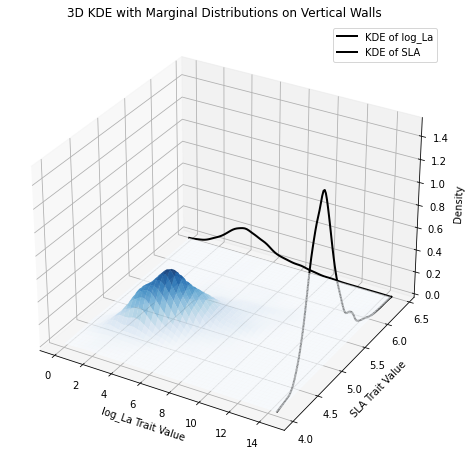

In [10]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=2, label="KDE of log_La")

# Plot p(y): KDE of SLA on the vertical wall along the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.full_like(y, max(log_la_data)), y, sla_density, color='black', lw=2, label="KDE of SLA")

# Customize the plot
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Marginal Distributions on Vertical Walls')

# Show plot
plt.legend()
plt.show()


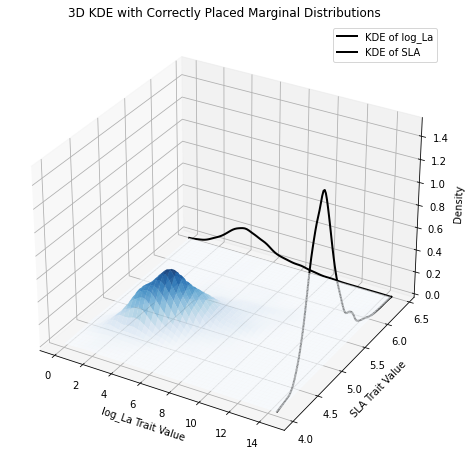

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# Plot p(x): KDE of log_La on the vertical wall along the SLA axis (Y axis)
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(y)), log_la_density, color='black', lw=2, label="KDE of log_La")

# Plot p(y): KDE of SLA on the vertical wall along the log_La axis (X axis)
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.full_like(y, max(x)), y, sla_density, color='black', lw=2, label="KDE of SLA")

# Customize the plot
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Correctly Placed Marginal Distributions')

# Show plot
plt.legend()
plt.show()


TypeError: plot() for multiple values for argument 'z'

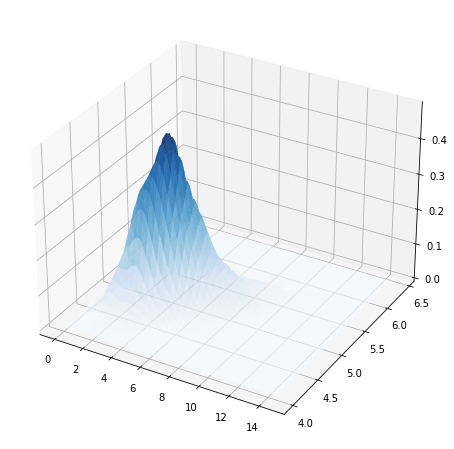

In [2]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\la\la_site1b_18_047.tif'
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\sla\sla_site1b_18_047.tif'

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
data = np.vstack([log_la_data, sla_data])
kde = gaussian_kde(data)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for the joint KDE of log_La and SLA
ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.7)

# KDE for log_La (on the Z-Y plane, vertical wall on the right side)
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, zs=0, zdir='y', color='black', lw=2, label="KDE of log_La")

# KDE for SLA (on the Z-X plane, vertical wall on the back side)
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.full_like(y, max(log_la_data)), y, sla_density, zs=0, zdir='x', color='black', lw=2, label="KDE of SLA")

# Customize the plot
ax.set_xlabel('log_La Trait Value')
ax.set_ylabel('SLA Trait Value')
ax.set_zlabel('Density')
ax.set_title('3D KDE with Correct Marginal Distributions on Vertical Walls')

# Show plot
plt.legend()
plt.show()


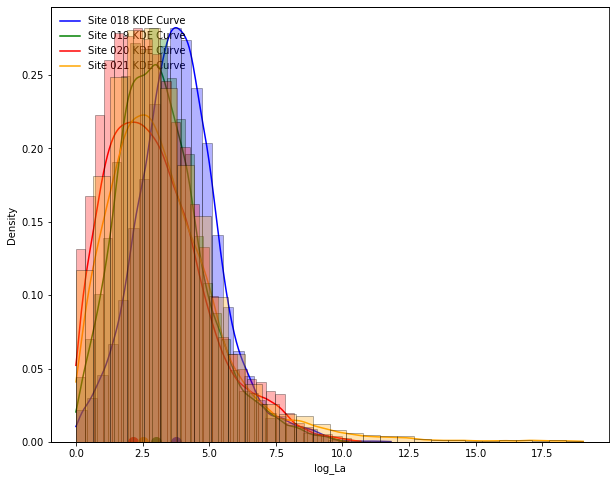

In [4]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_and_histograms(data_list, file_labels, colors, num_points=1000):
    num_datasets = len(data_list)
    
    fig, axes = plt.subplots(num_datasets, 1, figsize=(10, num_datasets * 4), sharex=True)  # Subplots for each dataset
    if num_datasets == 1:
        axes = [axes]  # To handle the case when there's only one subplot
    
    for i, (data, label, color) in enumerate(zip(data_list, file_labels, colors)):
        if data.size > 0:
            kde = gaussian_kde(data)
            x = np.linspace(data.min(), data.max(), num_points)
            pdf = kde(x)

            # Plot KDE curve
            axes[i].plot(x, pdf, color=color, label=f"{label} KDE", lw=2)

            # Find and plot the highest density point (median trait value)
            max_density_index = np.argmax(pdf)
            median_trait_value = x[max_density_index]

            # Plot median trait value as a larger circle
            axes[i].plot(median_trait_value, 0, 'o', color=color, markersize=8)  # Larger circle marker for median

            # Plot the histogram
            axes2 = axes[i].twinx()
            axes2.hist(data, bins=30, alpha=0.3, color=color, edgecolor='black')  # Histogram with transparency
            axes2.set_ylabel(None)  # Remove frequency labels on the right side
            axes2.set_yticks([])  # Remove y-ticks for histogram

            # Customize subplot
            axes[i].set_title(f"KDE and Histogram for {label}", fontsize=14)
            axes[i].set_ylabel('Density')
            axes[i].legend(loc='upper left', frameon=False)

    # Set shared x-axis label
    fig.text(0.5, 0.04, 'log_La', ha='center', fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.04, 1, 1])
    plt.show()

# Example usage for four images
file_paths = [
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_44_018.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_44_019.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_44_020.tif',
    r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site6\la\la_site6_44_021.tif'
]

data_list = [read_and_process_data(file) for file in file_paths]
file_labels = ['Site 018', 'Site 019', 'Site 020', 'Site 021']
colors = ['blue', 'green', 'red', 'orange']  # Different colors for differentiation

# Call the combined plot function
plot_combined_kde_and_hist(data_list, file_labels, colors)


C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


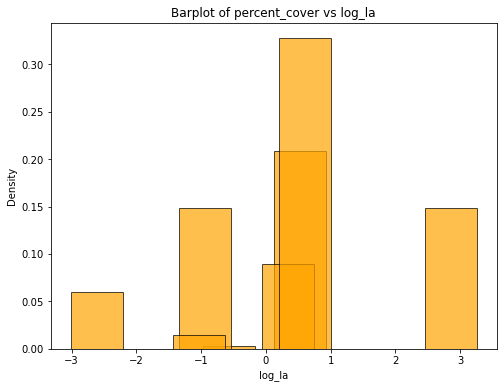

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_and_plot_bar(csv_file_path, x_column, density_column):
    # 读取CSV文件
    data = pd.read_csv(csv_file_path)

    # 提取指定列作为 x 和 y
    x = data[x_column]
    y = data[density_column]

    # 创建柱状图
    plt.figure(figsize=(8, 6))
    plt.bar(x, y, color='orange', edgecolor='black', alpha=0.7)  # 绘制柱状图
    plt.xlabel(x_column)
    plt.ylabel('Density')
    plt.title(f'Barplot of {density_column} vs {x_column}')
    
    # 显示图像
    plt.show()

# 示例使用函数
csv_file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\origin\site2a_qu7.csv'  # 替换为您的 CSV 文件路径
x_column = 'log_la'  # 替换为 CSV 文件中的 X 轴列名
density_column = 'percent_cover'  # 替换为 CSV 文件中的密度列名

read_csv_and_plot_bar(csv_file_path, x_column, density_column)


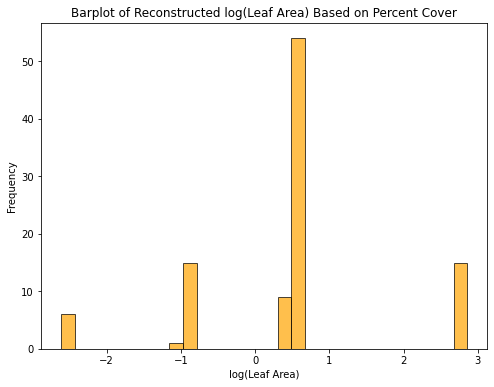

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = {
    'log_la': [2.853592506, 0.530628251, 0.34122284, 0.598836501, -0.57388376, -0.94160854, -2.612740026, -1.030953639],
    'percent_cover': [0.148809524, 0.208333333, 0.089285714, 0.327380952, 0.00297619, 0.148809524, 0.05952381, 0.014880952]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define the total number of trait values to reconstruct (for example, 100)
total_count = 100

# Reconstruct the data by replicating each trait value based on the percentage cover
reconstructed_data = []
for i, row in df.iterrows():
    # Calculate the number of times to replicate the log_la value
    count = int(round(row['percent_cover'] * total_count))
    reconstructed_data.extend([row['log_la']] * count)

# Convert to a DataFrame for easier handling or analysis
reconstructed_df = pd.DataFrame(reconstructed_data, columns=['log_la'])

# Draw a bar plot of the reconstructed data
plt.figure(figsize=(8, 6))
plt.hist(reconstructed_df['log_la'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('log(Leaf Area)')
plt.ylabel('Frequency')
plt.title('Barplot of Reconstructed log(Leaf Area) Based on Percent Cover')
plt.show()


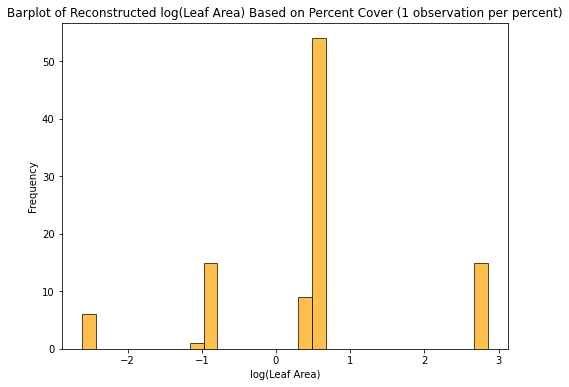

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    'log_la': [2.853592506, 0.530628251, 0.34122284, 0.598836501, -0.57388376, -0.94160854, -2.612740026, -1.030953639],
    'percent_cover': [0.148809524, 0.208333333, 0.089285714, 0.327380952, 0.00297619, 0.148809524, 0.05952381, 0.014880952]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert percent_cover to the number of observations (rounding to nearest integer)
df['observation_count'] = (df['percent_cover'] * 100).round().astype(int)

# Reconstruct the data by replicating each trait value based on the observation count
reconstructed_data = []
for i, row in df.iterrows():
    # Ensure the observation count is an integer
    observation_count = int(row['observation_count'])
    # Replicate log_la based on the observation_count
    reconstructed_data.extend([row['log_la']] * observation_count)

# Convert to a DataFrame for easier handling or analysis
reconstructed_df = pd.DataFrame(reconstructed_data, columns=['log_la'])

# Draw a bar plot of the reconstructed data
plt.figure(figsize=(8, 6))
plt.hist(reconstructed_df['log_la'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('log(Leaf Area)')
plt.ylabel('Frequency')
plt.title('Barplot of Reconstructed log(Leaf Area) Based on Percent Cover (1 observation per percent)')
plt.show()



Highest Density Point: x = 0.91, y = 0.61297
Resampled Standard Deviation: 0.59, Sigma Density: 0.43785


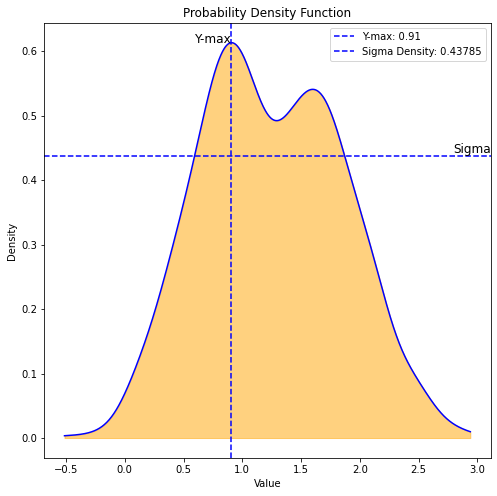

In [2]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, resampled_std_value, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        # Plot the KDE curve and filled area under it
        plt.fill_between(x, pdf, alpha=0.5, color='orange')  # Filled area under the curve
        plt.plot(x, pdf, color='blue')  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        plt.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Print the x and y values of the highest density point
        print(f"Highest Density Point: x = {max_density_value:.2f}, y = {max_density_y:.5f}")

        # Find the y-density corresponding to the resampled data standard deviation (resampled_std_value)
        sigma_density = kde(resampled_std_value)  # Get the KDE value (density) at resampled std

        # Add a horizontal dashed line at the Sigma density level
        plt.axhline(sigma_density, color='blue', linestyle='--', label=f'Sigma Density: {sigma_density[0]:.5f}')

        # Print the resampled standard deviation and its corresponding density value
        print(f"Resampled Standard Deviation: {resampled_std_value:.2f}, Sigma Density: {sigma_density[0]:.5f}")

        # Label positioning for the plot
        plt.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')
        plt.text(x.max() * 0.95, sigma_density, "Sigma", fontsize=12, va='bottom', color='black')

        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(title)

        # Remove grid lines
        plt.grid(False)
        
        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Calculate the standard deviation of the resampled data
        resampled_std_value = np.std(new_data)

        # Plot resampled KDE with highest density and std line
        plt.figure(figsize=(8, 8))  # Make the plot square
        plot_kde_with_density_and_std(new_data, resampled_std_value, title="Probability Density Function")

    else:
        print("Insufficient data for KDE.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


Highest Density Point: x = 0.86, y = 0.61028
Standard Deviation of PDF curve: 0.61, Sigma Density: 0.45540


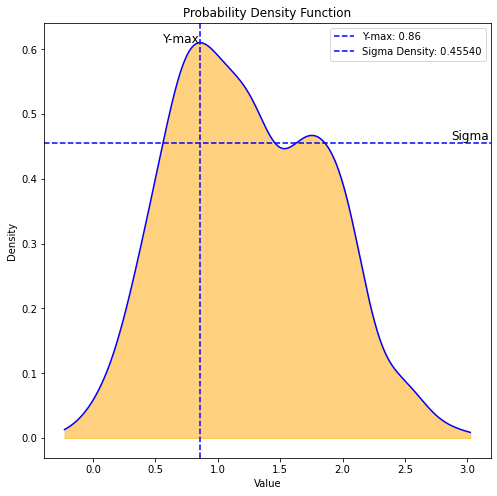

In [3]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde_with_density_and_std(data, num_points=1000, title="Probability Density Function"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)

        # Plot the KDE curve and filled area under it
        plt.fill_between(x, pdf, alpha=0.5, color='orange')  # Filled area under the curve
        plt.plot(x, pdf, color='blue')  # KDE curve

        # Find and plot the highest density point (Y-max)
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        max_density_y = pdf[max_density_index]
        plt.axvline(max_density_value, color='blue', linestyle='--', label=f'Y-max: {max_density_value:.2f}')

        # Print the x and y values of the highest density point
        print(f"Highest Density Point: x = {max_density_value:.2f}, y = {max_density_y:.5f}")

        # Compute the mean and standard deviation of the PDF curve (weighted by the PDF values)
        mean_pdf = np.sum(x * pdf) / np.sum(pdf)  # Mean of the PDF curve
        std_pdf = np.sqrt(np.sum((x - mean_pdf) ** 2 * pdf) / np.sum(pdf))  # Std of the PDF curve

        # Find the y-density corresponding to the standard deviation position
        sigma_density = kde(mean_pdf + std_pdf)  # Get the KDE value (density) at mean + std

        # Add a horizontal dashed line at the Sigma density level
        plt.axhline(sigma_density, color='blue', linestyle='--', label=f'Sigma Density: {sigma_density[0]:.5f}')

        # Print the standard deviation and its corresponding density value
        print(f"Standard Deviation of PDF curve: {std_pdf:.2f}, Sigma Density: {sigma_density[0]:.5f}")

        # Label positioning for the plot
        plt.text(max_density_value, max_density_y, "Y-max", fontsize=12, ha='right', color='black')
        plt.text(x.max() * 0.95, sigma_density, "Sigma", fontsize=12, va='bottom', color='black')

        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(title)

        # Remove grid lines
        plt.grid(False)
        
        plt.show()
    else:
        print("No data available to plot.")

def plot_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        new_data = kde.resample(1000)[0]

        # Plot resampled KDE with highest density and std line
        plt.figure(figsize=(8, 8))  # Make the plot square
        plot_kde_with_density_and_std(new_data, title="Probability Density Function")

    else:
        print("Insufficient data for KDE.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_resampled_kde(x_data)


X-coordinate of highest density: 0.8854
Highest density value: 0.623974
Standard deviation of the KDE: 0.595460
50 points written to kde_coordinates.csv


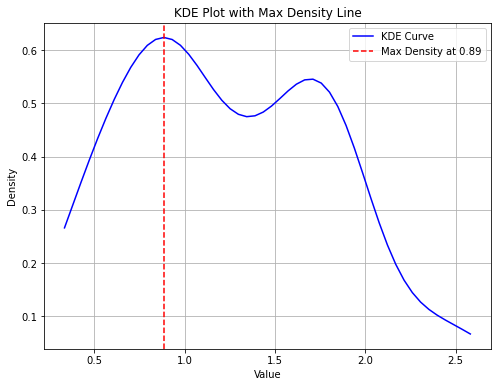

In [3]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv

# Function to read and process the data from the file
def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

# Function to generate KDE, save 50 points to a CSV, print additional info, and plot the curve
def save_kde_points_and_print_info(data, csv_filename="kde_coordinates.csv", num_points=50):
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), num_points)
    pdf = kde(x)

    # Find x-coordinate corresponding to the highest density
    max_density_index = np.argmax(pdf)
    max_density_value = pdf[max_density_index]
    x_at_max_density = x[max_density_index]
    
    # Calculate the standard deviation of the KDE
    std_kde = np.std(kde.resample(1000)[0])

    # Print the x-coordinate, corresponding density, and standard deviation
    print(f"X-coordinate of highest density: {x_at_max_density:.4f}")
    print(f"Highest density value: {max_density_value:.6f}")
    print(f"Standard deviation of the KDE: {std_kde:.6f}")

    # Save 50 points from the KDE to a CSV file
    points = list(zip(x, pdf))
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y"])  # Write header
        writer.writerows(points)  # Write the points

    print(f"50 points written to {csv_filename}")

    # Plot the KDE curve
    plt.figure(figsize=(8, 6))
    plt.plot(x, pdf, label='KDE Curve', color='blue')
    plt.axvline(x_at_max_density, color='red', linestyle='--', label=f'Max Density at {x_at_max_density:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('KDE Plot with Max Density Line')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage of the code
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)

# Save the points to a CSV file, print the required information, and plot the KDE curve
save_kde_points_and_print_info(x_data, "kde_coordinates.csv")


In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import csv

# Function to read and process the data from the file
def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

# Function to generate KDE, save 50 points to a CSV, and print additional info
def save_kde_points_and_print_info(data, csv_filename=r"E:\wenqu\trait_map\trait_map_after_georeference\origin\kde_points.csv", num_points=50):
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), num_points)
    pdf = kde(x)

    # Find x-coordinate corresponding to the highest density
    max_density_index = np.argmax(pdf)
    max_density_value = pdf[max_density_index]
    x_at_max_density = x[max_density_index]
    
    # Calculate the standard deviation of the KDE
    std_kde = np.std(kde.resample(1000)[0])

    # Print the x-coordinate, corresponding density, and standard deviation
    print(f"X-coordinate of highest density: {x_at_max_density:.4f}")
    print(f"Highest density value: {max_density_value:.6f}")
    print(f"Standard deviation of the KDE: {std_kde:.6f}")

    # Save 50 points from the KDE to a CSV file
    points = list(zip(x, pdf))
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y"])  # Write header
        writer.writerows(points)  # Write the points

    print(f"50 points written to {csv_filename}")

# Example usage of the code
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)

# Save the points to a CSV file and print the required information
save_kde_points_and_print_info(x_data, "kde_coordinates.csv")


X-coordinate of highest density: 0.8854
Highest density value: 0.623974
Standard deviation of the KDE: 0.599850
50 points written to kde_coordinates.csv


50 points written to E:\wenqu\trait_map\trait_map_after_georeference\origin\kde_points.csv


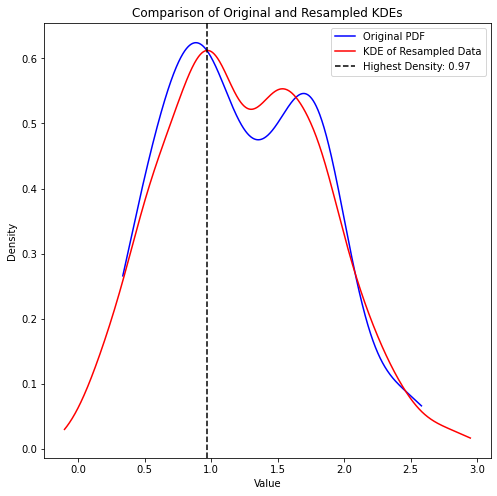

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde(data, num_points=1000, title="KDE of Resampled Data"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)
        plt.plot(x, pdf, label=title, color='red')

        # Add a vertical dashed line at the point with the highest density
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        plt.axvline(max_density_value, color='black', linestyle='--', label=f'Highest Density: {max_density_value:.2f}')
        
        # Generate 50 points on the KDE curve
        points_x = np.linspace(data.min(), data.max(), 50)  # 50 points along the x-axis
        points_y = kde(points_x)  # Corresponding KDE values
        points = list(zip(points_x, points_y))

        # Write the 50 points to a CSV file
        csv_file = r"E:\wenqu\trait_map\trait_map_after_georeference\origin\kde_points.csv"
        with open(csv_file, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["x", "y"])  # Header
            writer.writerows(points)  # Write the points
        
        print(f"50 points written to {csv_file}")

    else:
        print("No data available to plot.")

def plot_data_and_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        x = np.linspace(x_data.min(), x_data.max(), 1000)
        pdf = kde(x)

        # Generate new data from the PDF using KDE
        new_data = kde.resample(1000)[0]

        # Plot original KDE and resampled KDE
        plt.figure(figsize=(8, 8))  # Make the plot square
        plt.plot(x, pdf, label='Original PDF', color='blue')
        plot_kde(new_data, title="KDE of Resampled Data", num_points=1000)

        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title('Comparison of Original and Resampled KDEs')

        # Remove grid lines
        plt.grid(False)
        
        plt.show()
    else:
        print("Insufficient data for KDE.")

# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    return data[data > 0].flatten()

def plot_kde(data, num_points=1000, title="KDE of Resampled Data"):
    if data.size > 0:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), num_points)
        pdf = kde(x)
        plt.plot(x, pdf, label=title, color='red')

        # Add a vertical dashed line at the point with the highest density
        max_density_index = np.argmax(pdf)
        max_density_value = x[max_density_index]
        plt.axvline(max_density_value, color='black', linestyle='--', label=f'Highest Density: {max_density_value:.2f}')
    else:
        print("No data available to plot.")

# def plot_data_and_resampled_kde(x_data):
#     if x_data.size > 0:
#         kde = gaussian_kde(x_data)
#         x = np.linspace(x_data.min(), x_data.max(), 1000)
#         pdf = kde(x)

#         # Generate new data from the PDF using KDE
#         new_data = kde.resample(1000)[0]

#         # Plot original KDE and resampled KDE
#         plt.figure(figsize=(12, 6))
#         plt.plot(x, pdf, label='Original PDF', color='blue')
#         plot_kde(new_data, title="KDE of Resampled Data", num_points=1000)
#         plt.legend()
#         plt.xlabel('Value')
#         plt.ylabel('Density')
#         plt.title('Comparison of Original and Resampled KDEs')
#         plt.grid(True)
#         plt.show()
#     else:
#         print("Insufficient data for KDE.")




In [2]:
def plot_data_and_resampled_kde(x_data):
    if x_data.size > 0:
        kde = gaussian_kde(x_data)
        x = np.linspace(x_data.min(), x_data.max(), 1000)
        pdf = kde(x)

        # Generate new data from the PDF using KDE
        new_data = kde.resample(1000)[0]

        # Plot original KDE and resampled KDE
        plt.figure(figsize=(8, 8))  # Make the plot square
        plt.plot(x, pdf, label='Original PDF', color='blue')
        plot_kde(new_data, title="KDE of Resampled Data", num_points=1000)

        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title('Comparison of Original and Resampled KDEs')

        # Remove grid lines
        plt.grid(False)
        
        plt.show()
    else:
        print("Insufficient data for KDE.")

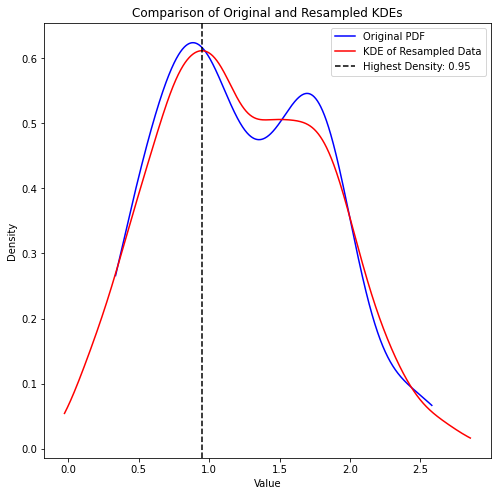

In [3]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


In [ ]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q1.tif'


x_data = read_and_process_data(file_path)


plot_data_and_resampled_kde(x_data)


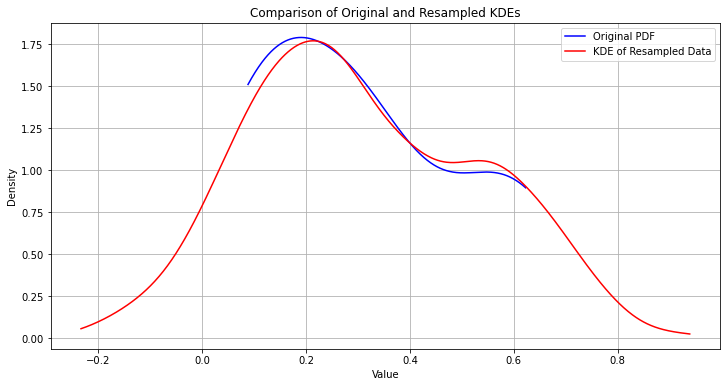

In [3]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q2.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


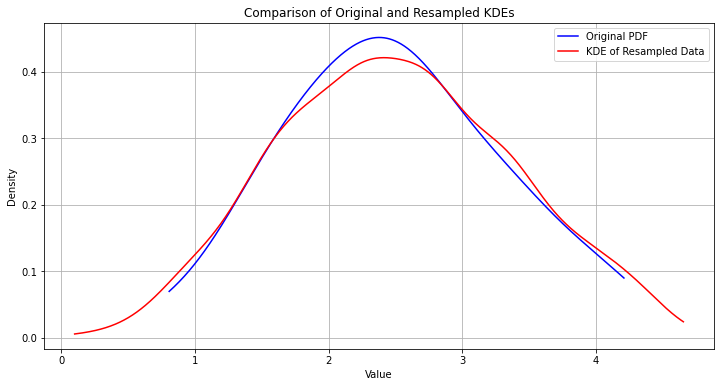

In [4]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q3.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


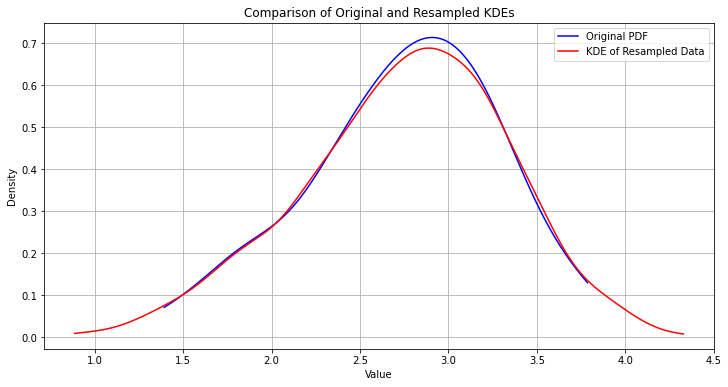

In [5]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q4.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


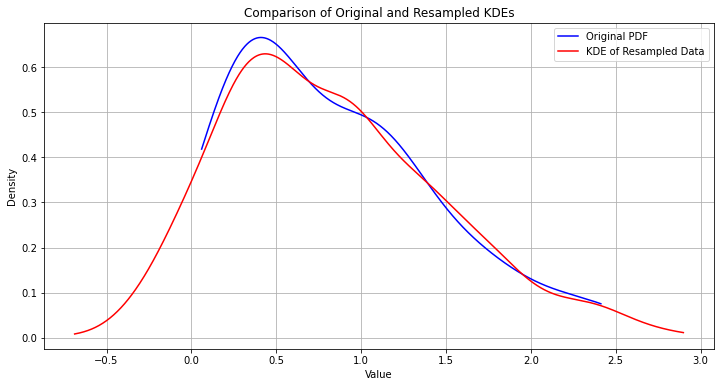

In [6]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q5.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


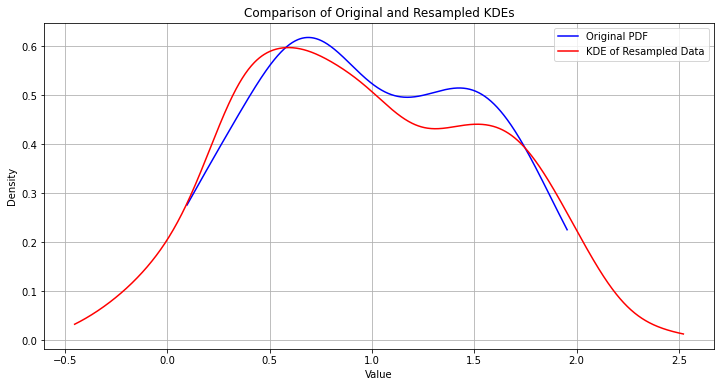

In [7]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q6.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


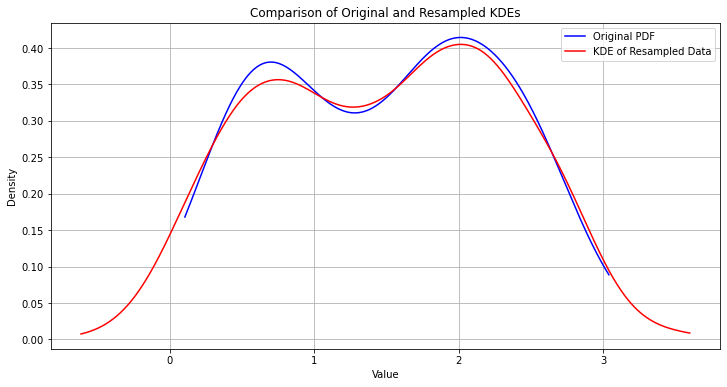

In [8]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q7.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


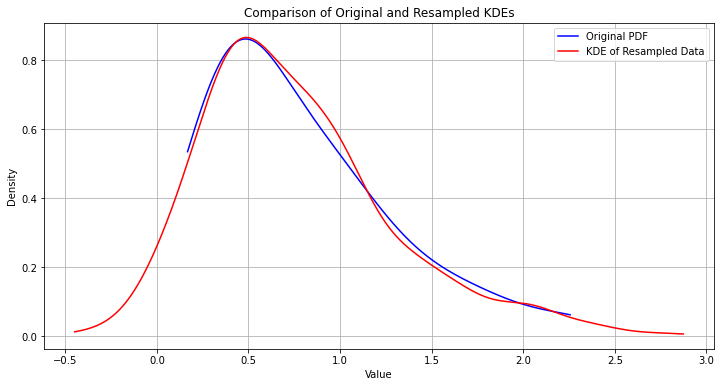

In [9]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q8.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


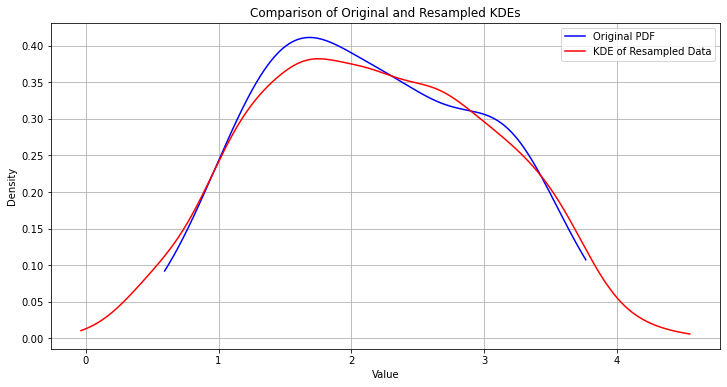

In [10]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q9.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


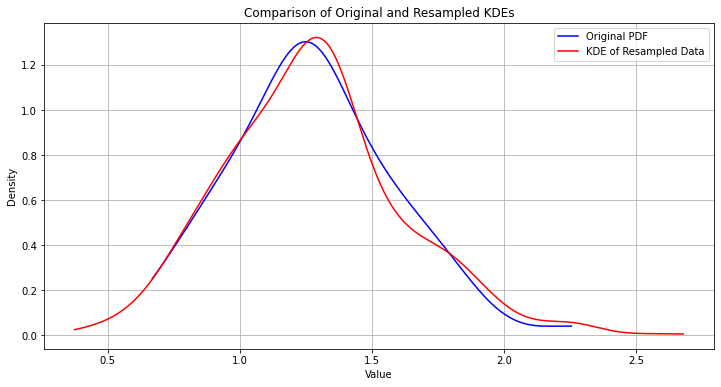

In [11]:
# Example of calling the function
file_path = r'E:\wenqu\trait_map\trait_map_after_georeference\site2a_quadrat_clip\site2a_la_q10.tif'
x_data = read_and_process_data(file_path)
plot_data_and_resampled_kde(x_data)


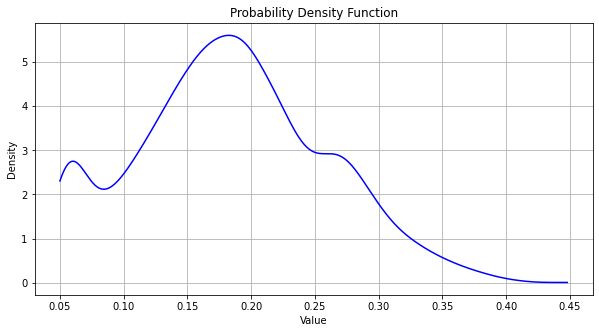

KDE Equation:
f(x) = (1 / (n * h * sqrt(2 * pi))) * Σ(exp(-((x - xi)^2) / (2 * h^2)))
where n = 4753, h = 0.0137


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from scipy.stats import gaussian_kde

def read_and_process_data(file_name):
    data = gdal.Open(file_name).ReadAsArray()
    valid_data = data[data > 0.05].flatten()  # filter out non-valid values
    return valid_data

def calculate_kde(data_points):
    kde = gaussian_kde(data_points)
    return kde

def plot_kde(kde, data_points):
    x = np.linspace(min(data_points), max(data_points), 1000)
    pdf = kde(x)
    plt.figure(figsize=(10, 5))
    plt.plot(x, pdf, label='KDE', color='blue')
    plt.title('Probability Density Function')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    return x, pdf

def print_kde_equation(kde, data_points):
    bandwidth = kde.factor * np.std(data_points, ddof=1)  # Calculate the bandwidth
    print("KDE Equation:")
    print("f(x) = (1 / (n * h * sqrt(2 * pi))) * Σ(exp(-((x - xi)^2) / (2 * h^2)))")
    print(f"where n = {len(data_points)}, h = {bandwidth:.4f}")

# Usage
file_path = r'D:\wenqu\clip\simulation_clip\site2a\site2a_qu_10.tif'  # Update your path accordingly
data_points = read_and_process_data(file_path)
kde = calculate_kde(data_points)
x, pdf = plot_kde(kde, data_points)
print_kde_equation(kde, data_points)


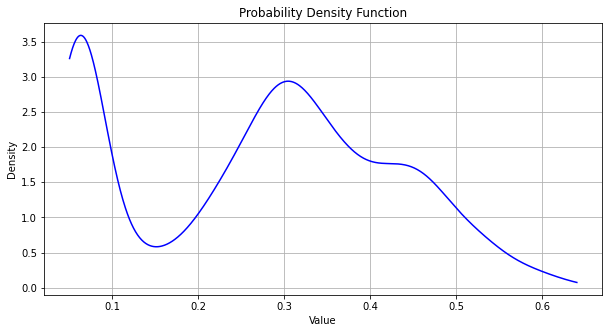

KDE Equation:
f(x) = (1 / (n * h * sqrt(2 * pi))) * Σ(exp(-((x - xi)^2) / (2 * h^2)))
where n = 5873, h = 0.0272


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from scipy.stats import gaussian_kde

def read_and_process_data(file_name):
    """
    Reads the given TIFF file, and processes it to return valid data points.
    """
    data = gdal.Open(file_name).ReadAsArray()
    valid_data = data[data > 0.05].flatten()  # Filter out values <= 0.05
    return valid_data

def calculate_kde(data_points):
    """
    Calculates the Kernel Density Estimation for the given data points.
    """
    kde = gaussian_kde(data_points)
    return kde

def plot_kde(kde, data_points):
    """
    Plots the KDE curve using a range of values based on the data points.
    """
    x = np.linspace(min(data_points), max(data_points), 1000)
    pdf = kde(x)
    plt.figure(figsize=(10, 5))
    plt.plot(x, pdf, label='KDE', color='blue')
    plt.title('Probability Density Function')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    return x, pdf

def print_kde_equation(kde, data_points):
    """
    Prints the KDE equation based on the calculated bandwidth and data points.
    """
    bandwidth = kde.factor * np.std(data_points, ddof=1)  # Calculate the bandwidth
    print("KDE Equation:")
    print("f(x) = (1 / (n * h * sqrt(2 * pi))) * Σ(exp(-((x - xi)^2) / (2 * h^2)))")
    print(f"where n = {len(data_points)}, h = {bandwidth:.4f}")

# Usage
file_path = r'D:\wenqu\clip\simulation_clip\site2a\site2a_qu_9.tif'  # Update your path accordingly
data_points = read_and_process_data(file_path)
kde = calculate_kde(data_points)
x, pdf = plot_kde(kde, data_points)
print_kde_equation(kde, data_points)
